# MNIST
MNIST is a subset of the larger NIST database. The MNIST database contains 60,000 training samples and 10,000 test samples. 

All have been size normalized and centered to a fixed size image(28x28 images of digits 0-9). Which makes it a good database for people who want try learning techniques and pattern recognition tasks on real-world dataset with minimum effort on pre-processin and formatting. 

And more convenient, scikit-learn could directly read those images in.

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')  # default data_home: ~/scikit_learn_data

#### However, this one may not working or too slow, so I prefer download from MNIST homepage and process the data myself.
#### NOTE

The MNIST data were downloaded in ./MNIST_data

In [25]:
import idx2numpy
img_size = 28 * 28
X_train = idx2numpy.convert_from_file("MNIST_data/train-images-idx3-ubyte")
X_train = X_train.reshape(-1, img_size)
y_train = idx2numpy.convert_from_file("MNIST_data/train-labels-idx1-ubyte")

X_test = idx2numpy.convert_from_file("MNIST_data/t10k-images-idx3-ubyte")
X_test = X_test.reshape(-1, img_size)
y_test = idx2numpy.convert_from_file("MNIST_data/t10k-labels-idx1-ubyte")

In [26]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, sep="\n")

(60000, 784)
(60000,)
(10000, 784)
(10000,)


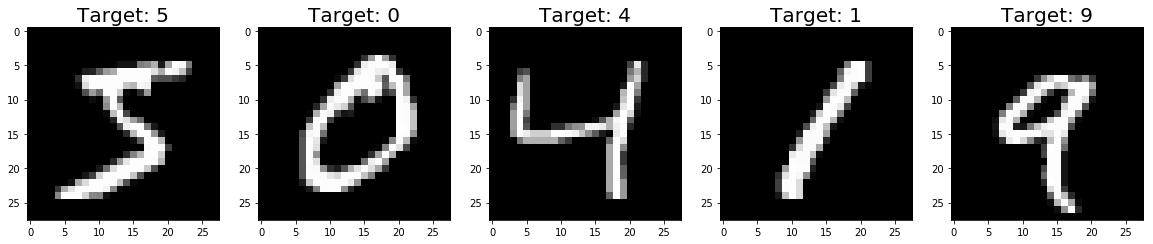

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for idx, (img, label) in enumerate(zip(X_train[:5], y_train[:5])):
    plt.subplot(1, 5, idx + 1)
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray)
    plt.title(f"Target: {label}", fontsize=20)

### Note

The default `liblinear` solver is good for small data set, for a larger dataset like this, we'd like to choose a faster optimizer, `lbfgs` here.

In [34]:
from sklearn.linear_model import LogisticRegression
logiRegr = LogisticRegression(solver='lbfgs')

In [36]:
logiRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

#### According to MNIST dataset descrpition, the first 5000 test cases are "easy" whereas the last 5000 are hard, Let's see if that's the case.

In [50]:
print("Accuracy on trainin dataset: ", logiRegr.score(X_train, y_train))

print("Accuracy on first 5000: ",
logiRegr.score(X_test[:5000], y_test[:5000]))

print("Accuracy on last 5000: ",
logiRegr.score(X_test[5000:], y_test[5000:]))

Accuracy on trainin dataset:  0.92615
0.9179
Accuracy on first 5000:  0.8942
Accuracy on last 5000:  0.9416


Accuracy here isn't conformant with their discription. And of course our accuracy on test dataset isn't satisfying enough for this well-known task. 

However here the model is simply multi-class logistic regression with 'One-Verse-Rest', so this only means that how power machine learning technique is and the importance of model selection and performance tuning in real-world problems

In [52]:
predictions = logiRegr.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(predictions, y_test)

In [53]:
print(cm)

[[ 957    0    8    3    1   11    7    3    9    9]
 [   0 1116   12    0    2    2    3    6   14    6]
 [   0    3  905   19    4    1    7   24    7    2]
 [   4    1   18  915    3   34    2    4   22   13]
 [   0    0    9    2  910   10    4    7   11   30]
 [   3    1    5   22    0  763   17    1   27    4]
 [   6    4   10    5   12   16  909    1    7    0]
 [   2    1   11   11    2    7    1  945   12   24]
 [   6    8   51   25   10   40    8    5  854   16]
 [   2    1    3    8   38    8    0   32   11  905]]


Confusion matrix is a fast and useful visualization for model output
#### And, have a look at the mis-classified digits.

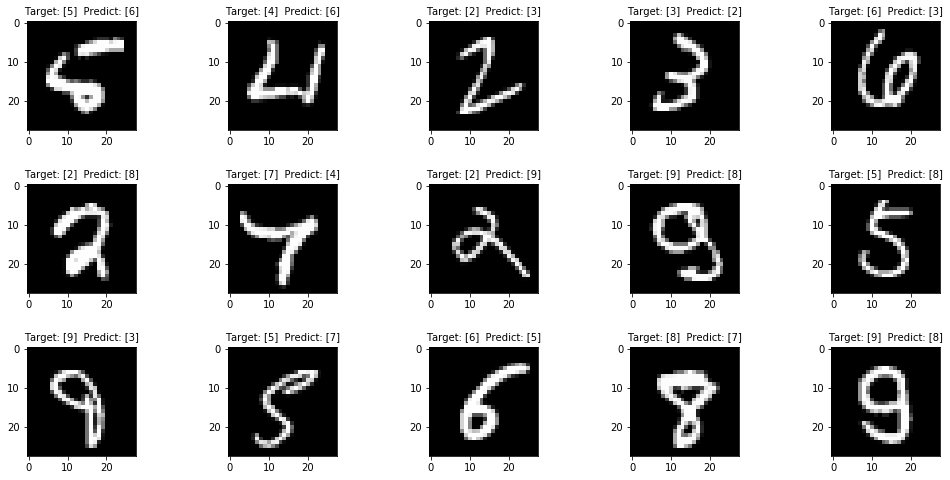

In [55]:
miss_index = np.argwhere(y_test != predictions)

truths = y_test[miss_index[:15]]
plt.figure(figsize=(20, 8))
plt.subplots_adjust(hspace=0.5, right=0.8)
for idx, (img, pred) in enumerate(zip(X_test[miss_index[:15]], predictions[miss_index[:15]])):
    plt.subplot(3, 5, idx + 1)
    plt.imshow(img.reshape(28, 28), cmap = plt.cm.gray)
    plt.title(f"Target: {truths[idx]}  Predict: {pred}", fontsize=10)